In [1]:
import os
import cv2
import numpy as np
from collections import Counter
from keras.optimizers import Adam
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
custom_optimizer = Adam(learning_rate=0.0005)
model=load_model(r"models/model.h5",compile=False)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy',metrics=['accuracy'])

2023-12-10 00:23:39.558611: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-10 00:23:39.558633: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-10 00:23:39.558643: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-10 00:23:39.558694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-10 00:23:39.558716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
predicted_labels=[]
original_labels=[]
for i in range(300):
    original_labels.append(0) #fake
for i in range(300):
    original_labels.append(1) #real

In [4]:
d_fake={}
testing_videos_fake=os.listdir('out_fake_ryv')[2517:]
for i in testing_videos_fake:
    d_fake[i[:-6]]=[]
for i in testing_videos_fake:
    img_test=cv2.imread(f'out_fake_ryv/{i}')
    d_fake[i[:-6]].append(img_test)

d_real={}
testing_videos_fake=os.listdir('out_real_ryv')[2541:]
for i in testing_videos_fake:
    d_real[i[:-6]]=[]
for i in testing_videos_fake:
    img_test=cv2.imread(f'out_real_ryv/{i}')
    d_real[i[:-6]].append(img_test)

In [5]:
len(d_real), len(d_fake)

(300, 300)

In [6]:
predicted_labels=[]

In [7]:
for i, j in d_fake.items():
    segment_predictions=[]
    for k in j:
        k=k/255.0
        batch_of_images = np.array([k] * 32)
        predictions=model.predict([batch_of_images])
        if(predictions[0][0]>0.5):
            pc=1
        else:
            pc=0
        segment_predictions.append(pc)
    print(segment_predictions)
    if(Counter(segment_predictions)[0]>=Counter(segment_predictions)[1]):
        vid_prediction=0
    else:
        vid_prediction=1
    predicted_labels.append(vid_prediction)

2023-12-10 00:23:40.450891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 554ms/step
[0]
1/1 [==============================] - 0s 13ms/step
[0]
1/1 [==============================] - 0s 13ms/step
[0]
1/1 [==============================] - 0s 15ms/step
[0]
1/1 [==============================] - 0s 13ms/step
[0]
1/1 [==============================] - 0s 12ms/step
[0]
1/1 [==============================] - 0s 12ms/step
[0]
1/1 [==============================] - 0s 11ms/step
[0]
1/1 [==============================] - 0s 12ms/step
[0]
1/1 [==============================] - 0s 11ms/step
[0]
1/1 [==============================] - 0s 11ms/step
[0]
1/1 [==============================] - 0s 12ms/step
[0]
1/1 [==============================] - 0s 13ms/step
[0]
1/1 [==============================] - 0s 16ms/step
[0]
1/1 [==============================] - 0s 11ms/step
[0]
1/1 [==============================] - 0s 11ms/step
[0]
1/1 [==============================] - 0s 11ms/step
[0]
1/1 [==============================] - 0s 12ms/

In [8]:
for i, j in d_real.items():
    segment_predictions=[]
    for k in j:
        k=k/255.0
        batch_of_images = np.array([k] * 32)
        predictions=model.predict([batch_of_images])
        if(predictions[0][0]>0.5):
            pc=1
        else:
            pc=0
        segment_predictions.append(pc)
    print(segment_predictions)
    if(Counter(segment_predictions)[0]>=Counter(segment_predictions)[1]):
        vid_prediction=0
    else:
        vid_prediction=1
    predicted_labels.append(vid_prediction)

1/1 [==============================] - 0s 17ms/step
[1]
1/1 [==============================] - 0s 11ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 11ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 11ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 11ms/step
[1]
1/1 [==============================] - 0s 11ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 13ms/step
[1]
1/1 [==============================] - 0s 11ms/s

In [9]:
print(len(predicted_labels), len(original_labels))

600 600


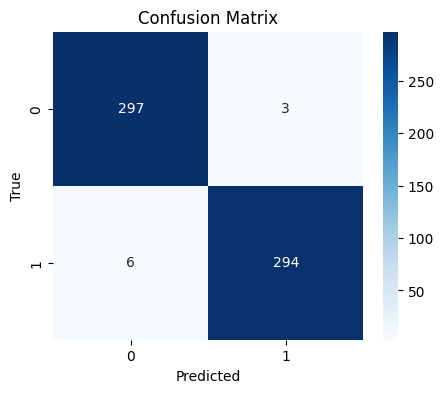

In [10]:

cm = confusion_matrix(original_labels, predicted_labels)

# Plot using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       300
           1       0.99      0.98      0.98       300

    accuracy                           0.98       600
   macro avg       0.99      0.98      0.98       600
weighted avg       0.99      0.98      0.98       600



In [12]:

accuracy = accuracy_score(original_labels, predicted_labels)
print("Accuracy     :", accuracy)
precision = precision_score(original_labels, predicted_labels)
print("Precision    :", precision)
recall = recall_score(original_labels, predicted_labels)
print("Recall       :", recall)
F1_score = f1_score(original_labels, predicted_labels)
print("F1-score     :", F1_score)

Accuracy     : 0.985
Precision    : 0.98989898989899
Recall       : 0.98
F1-score     : 0.9849246231155778
